In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False

## 统计-stats

### 连续概率分布

In [2]:
from scipy import stats
[k for k, v in stats.__dict__.items() if isinstance(v, stats.rv_continuous)]

['ksone',
 'kstwo',
 'kstwobign',
 'norm',
 'alpha',
 'anglit',
 'arcsine',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'fisk',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'dgamma',
 'dweibull',
 'expon',
 'exponnorm',
 'exponweib',
 'exponpow',
 'fatiguelife',
 'foldcauchy',
 'f',
 'foldnorm',
 'weibull_min',
 'truncweibull_min',
 'weibull_max',
 'genlogistic',
 'genpareto',
 'genexpon',
 'genextreme',
 'gamma',
 'erlang',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'gompertz',
 'gumbel_r',
 'gumbel_l',
 'halfcauchy',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'gausshyper',
 'invgamma',
 'invgauss',
 'geninvgauss',
 'norminvgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'logistic',
 'loggamma',
 'loglaplace',
 'lognorm',
 'gibrat',
 'maxwell',
 'mielke',
 'kappa4',
 'kappa3',
 'moyal',
 'nakagami',
 'ncx2',
 'ncf',
 't',
 'nct',
 'pareto',
 'lomax',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 

In [3]:
stats.norm.stats()

(0.0, 1.0)

In [4]:
X = stats.norm(loc=1.0, scale=2.0)
X.stats()

(1.0, 4.0)

In [5]:
x = X.rvs(size=10000) # 对随机变量取10000个值
np.mean(x), np.var(x) # 期望值和方差

(1.0052127949061636, 4.0398263122235445)

In [6]:
stats.norm.fit(x) # 得到随机序列期望值和标准差

(1.0052127949061636, 2.0099319173105203)

In [9]:
pdf, t = np.histogram(x, bins=100)  # 计算x中值的直方图，使用100个bins。pdf包含bin的高度，t包含bin的边界。
t = (t[:-1] + t[1:]) * 0.5  # 计算bin的中心，通过将相邻bin的边界相加再除以2。
cdf = np.cumsum(pdf) * (t[1] - t[0])  # 计算pdf值的累积和，并乘以bin宽度以得到累积分布函数。
p_error = pdf - X.pdf(t)  # 计算计算得到的pdf与随机变量X的理论pdf在bin中心处的误差。
c_error = cdf - X.cdf(t)  # 计算计算得到的cdf与随机变量X的理论cdf在bin中心处的误差。
print ("最大pdf误差: {}, 最大cdf误差: {}".format(
np.abs(p_error).max(),
np.abs(c_error).max()))  # 打印pdf和cdf的最大误差。


最大pdf误差: 365.80300324696606, 最大cdf误差: 1685.3792458083526


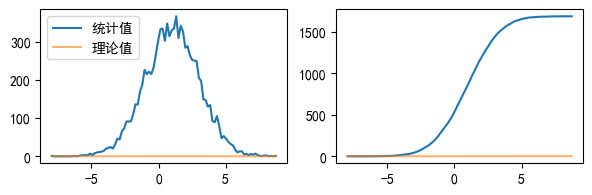

In [10]:
#%figonly=正态分布的概率密度函数（左）和累积分布函数（右）
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2))
ax1.plot(t, pdf, label=u"统计值")
ax1.plot(t, X.pdf(t), label=u"理论值", alpha=0.6)
ax1.legend(loc="best")
ax2.plot(t, cdf)
ax2.plot(t, X.cdf(t), alpha=0.6); 

In [11]:
print(stats.gamma.stats(1.0))
print(stats.gamma.stats(2.0))

(1.0, 1.0)
(2.0, 2.0)


In [12]:
stats.gamma.stats(2.0, scale=2)

(4.0, 8.0)

In [13]:
x = stats.gamma.rvs(2, scale=2, size=4)
x   

array([9.86472951, 0.8280342 , 0.9259295 , 1.60310529])

In [14]:
stats.gamma.pdf(x, 2, scale=2)

array([0.01777978, 0.13683051, 0.14569844, 0.17980103])

In [15]:
X = stats.gamma(2, scale=2) 
X.pdf(x)

array([0.01777978, 0.13683051, 0.14569844, 0.17980103])

### 离散概率分布

In [16]:
x = range(1, 7)    
p = (0.4, 0.2, 0.1, 0.1, 0.1, 0.1)

In [17]:
dice = stats.rv_discrete(values=(x, p))
dice.rvs(size=20)

array([1, 1, 1, 2, 6, 1, 5, 1, 5, 1, 4, 6, 3, 2, 1, 2, 2, 3, 1, 6])

In [18]:
np.random.seed(42)
samples = dice.rvs(size=(20000, 50))
samples_mean = np.mean(samples, axis=1)

### 核密度估计

C:\Users\hechang\AppData\Local\Temp\ipykernel_1984\2490367168.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kde = stats.kde.gaussian_kde(samples_mean)


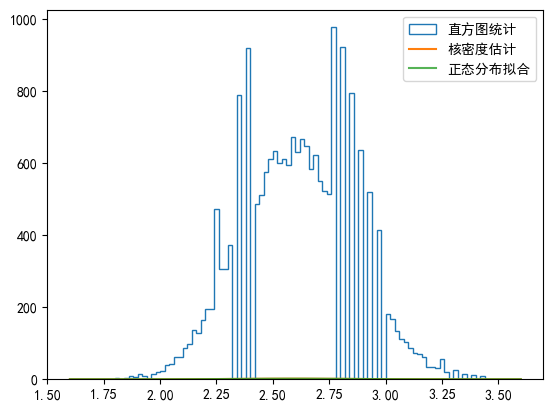

In [20]:
#%fig=核密度估计能更准确地表示随机变量的概率密度函数
_, bins, step = plt.hist(
    samples_mean, bins=100, histtype="step", label=u"直方图统计")
kde = stats.kde.gaussian_kde(samples_mean)
x = np.linspace(bins[0], bins[-1], 100)
plt.plot(x, kde(x), label=u"核密度估计")
mean, std = stats.norm.fit(samples_mean)
plt.plot(x, stats.norm(mean, std).pdf(x), alpha=0.8, label=u"正态分布拟合")
plt.legend()

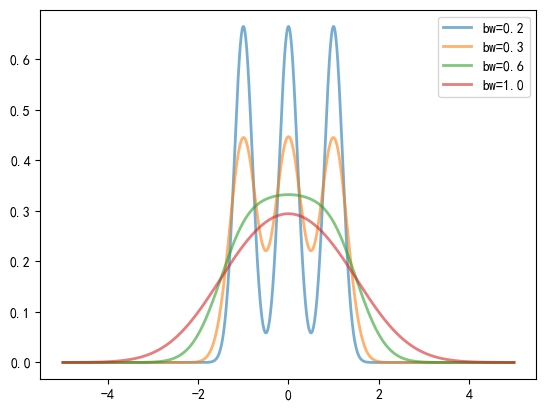

In [22]:
#%fig=`bw_method`参数越大核密度估计曲线越平滑
for bw in [0.2, 0.3, 0.6, 1.0]:
    kde = stats.gaussian_kde([-1, 0, 1], bw_method=bw)
    x = np.linspace(-5, 5, 1000)
    y = kde(x)
    plt.plot(x, y, lw=2, label="bw={}".format(bw), alpha=0.6)
plt.legend(loc="best");

### 二项、泊松、伽玛分布

In [23]:
stats.binom.pmf(range(6), 5, 1/6.0)

array([4.01877572e-01, 4.01877572e-01, 1.60751029e-01, 3.21502058e-02,
       3.21502058e-03, 1.28600823e-04])

0.0067553111033542
0.0006301754050737907


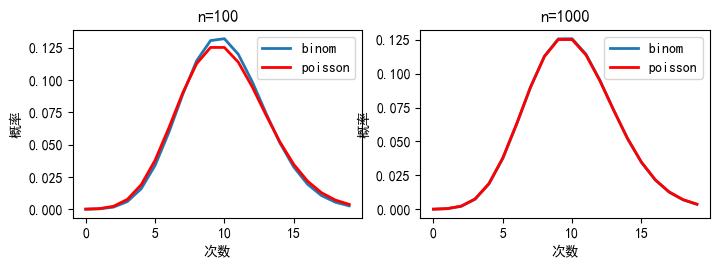

In [27]:
#%fig=当n足够大时二项分布和泊松分布近似相等
lambda_ = 10.0
x = np.arange(20)

n1, n2 = 100, 1000

y_binom_n1 = stats.binom.pmf(x, n1, lambda_ / n1)
y_binom_n2 = stats.binom.pmf(x, n2, lambda_ / n2)
y_poisson = stats.poisson.pmf(x, lambda_)
print(np.max(np.abs(y_binom_n1 - y_poisson)))
print(np.max(np.abs(y_binom_n2 - y_poisson)))
#%hide
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))

ax1.plot(x, y_binom_n1, label=u"binom", lw=2)
ax1.plot(x, y_poisson, label=u"poisson", lw=2, color="red")
ax2.plot(x, y_binom_n2, label=u"binom", lw=2)
ax2.plot(x, y_poisson, label=u"poisson", lw=2, color="red")
for n, ax in zip((n1, n2), (ax1, ax2)):
    ax.set_xlabel(u"次数")
    ax.set_ylabel(u"概率")
    ax.set_title("n={}".format(n))
    ax.legend()
fig.subplots_adjust(0.1, 0.15, 0.95, 0.90, 0.2, 0.1)

time=1000, max_error=0.01964230201602718
time=50000, max_error=0.001798012894964722


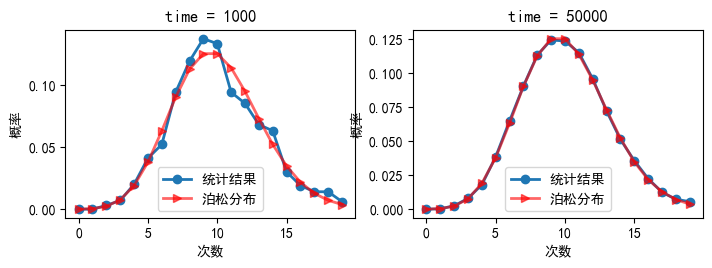

In [28]:
#%fig=模拟泊松分布
np.random.seed(42)


def sim_poisson(lambda_, time):
    t = np.random.uniform(0, time, size=lambda_ * time)  #❶
    count, time_edges = np.histogram(t, bins=time, range=(0, time))  #❷
    dist, count_edges = np.histogram(
        count, bins=20, range=(0, 20), density=True)  #❸
    x = count_edges[:-1]
    poisson = stats.poisson.pmf(x, lambda_)
    return x, poisson, dist


lambda_ = 10
times = 1000, 50000
x1, poisson1, dist1 = sim_poisson(lambda_, times[0])
x2, poisson2, dist2 = sim_poisson(lambda_, times[1])
max_error1 = np.max(np.abs(dist1 - poisson1))
max_error2 = np.max(np.abs(dist2 - poisson2))
print("time={}, max_error={}".format(times[0], max_error1))
print("time={}, max_error={}".format(times[1], max_error2))
#%hide
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))

ax1.plot(x1, dist1, "-o", lw=2, label=u"统计结果")
ax1.plot(x1, poisson1, "->", lw=2, label=u"泊松分布", color="red", alpha=0.6)
ax2.plot(x2, dist2, "-o", lw=2, label=u"统计结果")
ax2.plot(x2, poisson2, "->", lw=2, label=u"泊松分布", color="red", alpha=0.6)

for ax, time in zip((ax1, ax2), times):
    ax.set_xlabel(u"次数")
    ax.set_ylabel(u"概率")
    ax.set_title(u"time = {}".format(time))
    ax.legend(loc="lower center")

fig.subplots_adjust(0.1, 0.15, 0.95, 0.90, 0.2, 0.1)

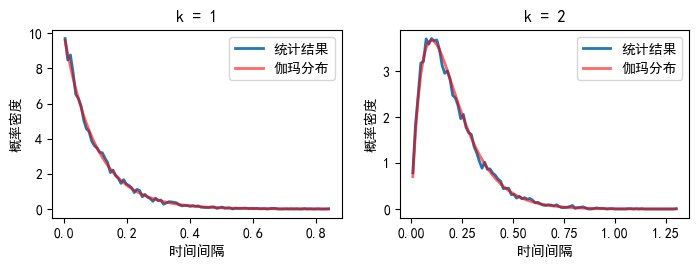

In [29]:
#%fig=模拟伽玛分布
def sim_gamma(lambda_, time, k):
    t = np.random.uniform(0, time, size=lambda_ * time) #❶
    t.sort()  #❷
    interval = t[k:] - t[:-k] #❸
    dist, interval_edges = np.histogram(interval, bins=100, density=True) #❹
    x = (interval_edges[1:] + interval_edges[:-1])/2  #❺
    gamma = stats.gamma.pdf(x, k, scale=1.0/lambda_) #❺
    return x, gamma, dist

lambda_ = 10
time = 1000
ks = 1, 2
x1, gamma1, dist1 = sim_gamma(lambda_, time, ks[0])
x2, gamma2, dist2 = sim_gamma(lambda_, time, ks[1])
#%hide
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))

ax1.plot(x1, dist1,  lw=2, label=u"统计结果")
ax1.plot(x1, gamma1, lw=2, label=u"伽玛分布", color="red", alpha=0.6)
ax2.plot(x2, dist2,  lw=2, label=u"统计结果")
ax2.plot(x2, gamma2, lw=2, label=u"伽玛分布", color="red", alpha=0.6)

for ax, k in zip((ax1, ax2), ks):
    ax.set_xlabel(u"时间间隔")
    ax.set_ylabel(u"概率密度")
    ax.set_title(u"k = {}".format(k))
    ax.legend(loc="upper right")
    
fig.subplots_adjust(0.1, 0.15, 0.95, 0.90, 0.2, 0.1);

In [30]:
T = 100000
A_count = int(T / 5)
B_count = int(T / 10)

A_time = np.random.uniform(0, T, A_count) #❶
B_time = np.random.uniform(0, T, B_count)

bus_time = np.concatenate((A_time, B_time)) #❷
bus_time.sort()

N = 200000
passenger_time = np.random.uniform(bus_time[0], bus_time[-1], N) #❸

idx = np.searchsorted(bus_time, passenger_time) #❹
np.mean(bus_time[idx] - passenger_time) * 60    #❺

202.3388747879705

In [31]:
np.mean(np.diff(bus_time)) * 60

199.99833251643057

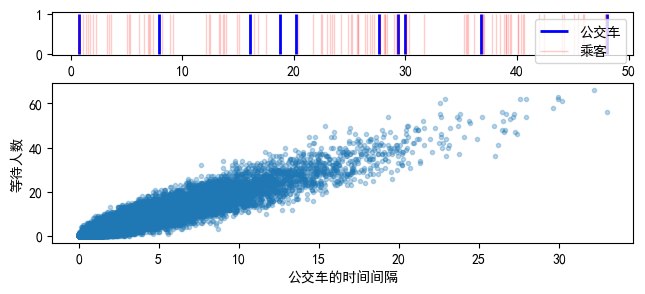

In [32]:
#%figonly=观察者偏差
import matplotlib.gridspec as gridspec
plt.figure(figsize=(7.5, 3))

G = gridspec.GridSpec(10, 1)
ax1 = plt.subplot(G[:2,  0])
ax2 = plt.subplot(G[3:, 0])

ax1.vlines(bus_time[:10], 0, 1, lw=2, color="blue", label=u"公交车")
ptime = np.random.uniform(bus_time[0], bus_time[9], 100)
ax1.vlines(ptime, 0, 1, lw=1, color="red", alpha=0.2, label=u"乘客")
ax1.legend()
count, bins = np.histogram(passenger_time, bins=bus_time)
ax2.plot(np.diff(bins), count, ".", alpha=0.3, rasterized=True)
ax2.set_xlabel(u"公交车的时间间隔")
ax2.set_ylabel(u"等待人数");

In [33]:
from scipy import integrate
t = 10.0 / 3  # 两辆公交车之间的平均时间间隔
bus_interval = stats.gamma(1, scale=t)
n, _ = integrate.quad(lambda x: 0.5 * x * x * bus_interval.pdf(x), 0, 1000)
d, _ = integrate.quad(lambda x: x * bus_interval.pdf(x), 0, 1000)
n / d * 60

200.0

### 学生t-分布与t检验

max error: 0.006832108369761503


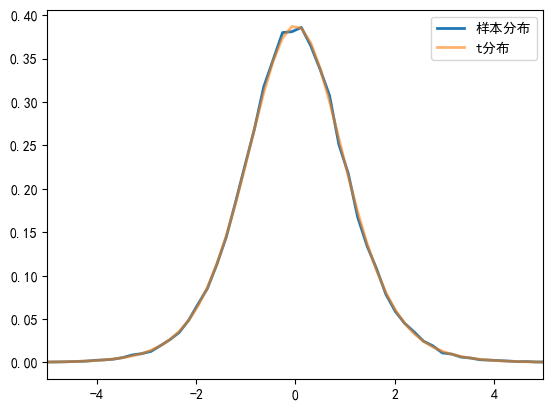

In [34]:
#%fig=模拟学生t-分布
mu = 0.0
n = 10
samples = stats.norm(mu).rvs(size=(100000, n))  #❶
t_samples = (np.mean(samples, axis=1) - mu) / np.std(
    samples, ddof=1, axis=1) * n**0.5  #❷
sample_dist, x = np.histogram(t_samples, bins=100, density=True)  #❸
x = 0.5 * (x[:-1] + x[1:])
t_dist = stats.t(n - 1).pdf(x)
print("max error:", np.max(np.abs(sample_dist - t_dist)))
#%hide
plt.plot(x, sample_dist, lw=2, label=u"样本分布")
plt.plot(x, t_dist, lw=2, alpha=0.6, label=u"t分布")
plt.xlim(-5, 5)
plt.legend(loc="best")

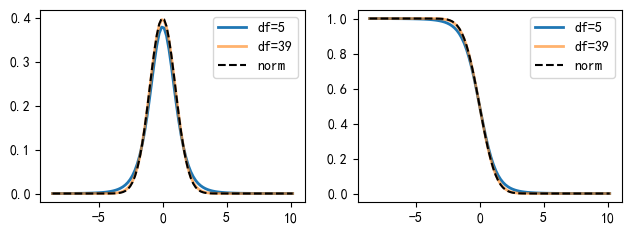

In [35]:
#%figonly=当`df`增大，学生t-分布趋向于正态分布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 2.5))
ax1.plot(x, stats.t(6-1).pdf(x), label=u"df=5", lw=2)
ax1.plot(x, stats.t(40-1).pdf(x), label=u"df=39", lw=2, alpha=0.6)
ax1.plot(x, stats.norm.pdf(x), "k--", label=u"norm")
ax1.legend()

ax2.plot(x, stats.t(6-1).sf(x), label=u"df=5", lw=2)
ax2.plot(x, stats.t(40-1).sf(x), label=u"df=39", lw=2, alpha=0.6)
ax2.plot(x, stats.norm.sf(x), "k--", label=u"norm")
ax2.legend();

In [36]:
n = 30
np.random.seed(42)
s = stats.norm.rvs(loc=1, scale=0.8, size=n)

In [37]:
t = (np.mean(s) - 0.5) / (np.std(s, ddof=1) / np.sqrt(n))
print (t, stats.ttest_1samp(s, 0.5))

2.658584340882224 TtestResult(statistic=2.658584340882224, pvalue=0.01263770225709123, df=29)


In [38]:
print ((np.mean(s) - 1) / (np.std(s, ddof=1) / np.sqrt(n)))
print (stats.ttest_1samp(s, 1), stats.ttest_1samp(s, 0.9))

-1.1450173670383303
TtestResult(statistic=-1.1450173670383303, pvalue=0.26156414618801477, df=29) TtestResult(statistic=-0.3842970254542196, pvalue=0.7035619103425202, df=29)


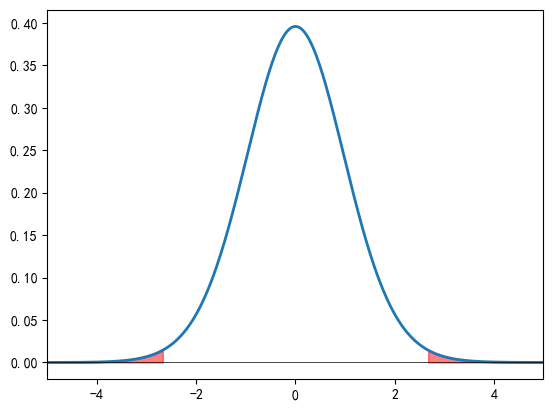

In [39]:
#%fig=红色部分为`ttest_1samp()`计算的p值
x = np.linspace(-5, 5, 500)
y = stats.t(n-1).pdf(x)
plt.plot(x, y, lw=2)
t, p = stats.ttest_1samp(s, 0.5)
mask = x > np.abs(t)
plt.fill_between(x[mask], y[mask], color="red", alpha=0.5)
mask = x < -np.abs(t)
plt.fill_between(x[mask], y[mask], color="red", alpha=0.5)
plt.axhline(color="k", lw=0.5)
plt.xlim(-5, 5);

In [40]:
from scipy import integrate
x = np.linspace(-10, 10, 100000)
y = stats.t(n-1).pdf(x)
mask = x >= np.abs(t)
integrate.trapz(y[mask], x[mask])*2

0.012633433707685972

In [41]:
m = 200000
mean = 0.5
r = stats.norm.rvs(loc=mean, scale=0.8, size=(m, n))
ts = (np.mean(s) - mean) / (np.std(s, ddof=1) / np.sqrt(n))
tr = (np.mean(r, axis=1) - mean) / (np.std(r, ddof=1, axis=1) / np.sqrt(n))
np.mean(np.abs(tr) > np.abs(ts))

0.012695

In [42]:
np.random.seed(42)

s1 = stats.norm.rvs(loc=1, scale=1.0, size=20)
s2 = stats.norm.rvs(loc=1.5, scale=0.5, size=20)
s3 = stats.norm.rvs(loc=1.5, scale=0.5, size=25)

print (stats.ttest_ind(s1, s2, equal_var=False)) #❶
print (stats.ttest_ind(s2, s3, equal_var=True))  #❷

TtestResult(statistic=-2.2391470627176755, pvalue=0.033250866086743665, df=28.072969108063)
TtestResult(statistic=-0.5946698521856172, pvalue=0.5551805875810539, df=43.0)


### 卡方分布和卡方检验

max error: 0.003070532098111506


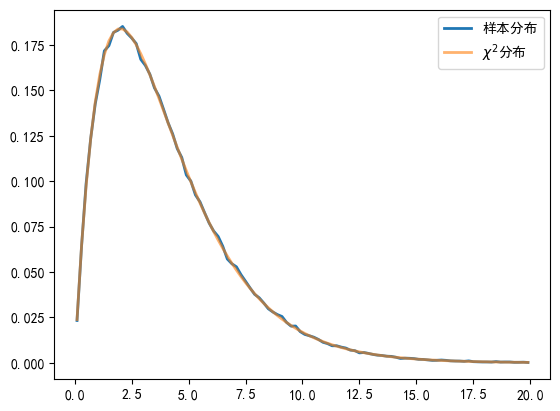

In [44]:
#%fig=使用随机数验证卡方分布
a = np.random.normal(size=(300000, 4))
cs = np.sum(a**2, axis=1)

sample_dist, bins = np.histogram(cs, bins=100, range=(0, 20), density=True)
x = 0.5 * (bins[:-1] + bins[1:])
chi2_dist = stats.chi2.pdf(x, 4)
print("max error:", np.max(np.abs(sample_dist - chi2_dist)))
#%hide
plt.plot(x, sample_dist, lw=2, label=u"样本分布")
plt.plot(x, chi2_dist, lw=2, alpha=0.6, label=u"$\chi ^{2}$分布")
plt.legend(loc="best")

C:\Users\hechang\AppData\Local\Temp\ipykernel_1984\1842059127.py:9: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = stats.kde.gaussian_kde(cs2) #❹


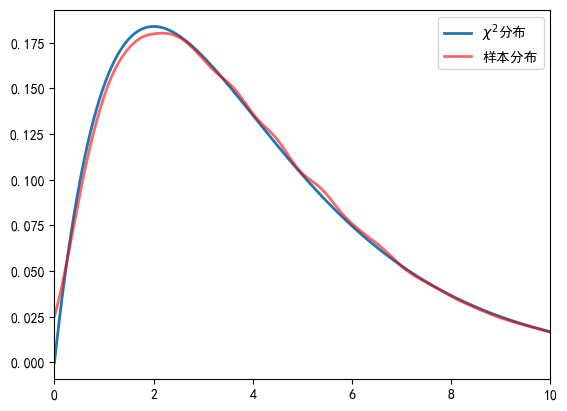

In [45]:
#%fig=模拟卡方分布
repeat_count = 60000
n, k = 100, 5

np.random.seed(42)
ball_ids = np.random.randint(0, k, size=(repeat_count, n)) #❶
counts = np.apply_along_axis(np.bincount, 1, ball_ids, minlength=k) #❷
cs2 = np.sum((counts - n/k)**2.0/(n/k), axis=1) #❸
k = stats.kde.gaussian_kde(cs2) #❹
x = np.linspace(0, 10, 200)
plt.plot(x, stats.chi2.pdf(x, 4), lw=2, label=u"$\chi ^{2}$分布")
plt.plot(x, k(x), lw=2, color="red", alpha=0.6, label=u"样本分布")
plt.legend(loc="best")
plt.xlim(0, 10);

In [46]:
def choose_balls(probabilities, size):
    r = stats.rv_discrete(values=(range(len(probabilities)), probabilities))
    s = r.rvs(size=size)
    counts = np.bincount(s)    
    return counts

np.random.seed(42)
counts1 = choose_balls([0.18, 0.24, 0.25, 0.16, 0.17], 400)
counts2 = choose_balls([0.2]*5, 400)

print(counts1)
print(counts2)

[80 93 97 64 66]
[89 76 79 71 85]


In [47]:
chi1, p1 = stats.chisquare(counts1)
chi2, p2 = stats.chisquare(counts2)

print ("chi1 =", chi1, "p1 =", p1)
print ("chi2 =", chi2, "p2 =", p2)

chi1 = 11.375 p1 = 0.022657601239769634
chi2 = 2.55 p2 = 0.6357054527037017


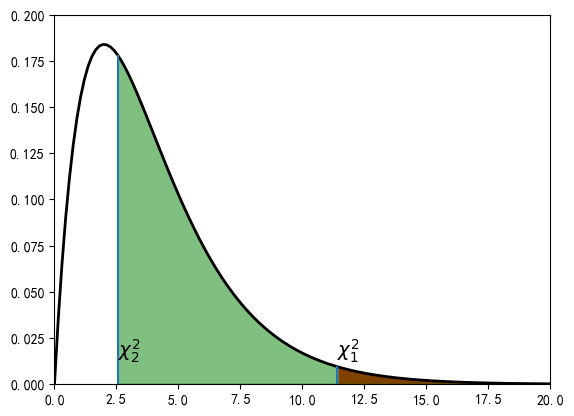

In [48]:
#%figonly=卡方检验计算的概率为阴影部分的面积
x = np.linspace(0, 30, 200)
CHI2 = stats.chi2(4)
plt.plot(x, CHI2.pdf(x), "k", lw=2)
plt.vlines(chi1, 0, CHI2.pdf(chi1))
plt.vlines(chi2, 0, CHI2.pdf(chi2))
plt.fill_between(x[x>chi1], 0, CHI2.pdf(x[x>chi1]), color="red", alpha=1.0)
plt.fill_between(x[x>chi2], 0, CHI2.pdf(x[x>chi2]), color="green", alpha=0.5)
plt.text(chi1, 0.015, r"$\chi^2_1$", fontsize=14)
plt.text(chi2, 0.015, r"$\chi^2_2$", fontsize=14)
plt.ylim(0, 0.2)
plt.xlim(0, 20);

In [49]:
table = [[43, 9], [44, 4]]
chi2, p, dof, expected = stats.chi2_contingency(table)
print(chi2)
print(p)

1.0724852071005921
0.300384770390566


In [50]:
stats.fisher_exact(table)

SignificanceResult(statistic=0.43434343434343436, pvalue=0.2391569568222429)